In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [44]:
# Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [45]:
#Виведіть перші п'ять рядків (використовується функція head)

df.head

<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    

In [46]:
#Виведіть розміри датасету (використовуйте атрибут shape)

df.shape

(550, 7)

In [47]:
#Відповідь: Про скільки книг зберігає дані датасет?
df.shape[0]

550

In [48]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [49]:
#Перевірте, чи у всіх рядків вистачає даних:
#виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

spaces = df.isnull()
res = pd.DataFrame()
res['amount_of_spaces'] = np.sum(spaces, axis=0)
res

,amount_of_spaces
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


In [50]:
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

#ні


In [51]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [52]:
#Відповідь: Які є унікальні жанри?

print(df['genre'].unique())

['Non Fiction' 'Fiction']


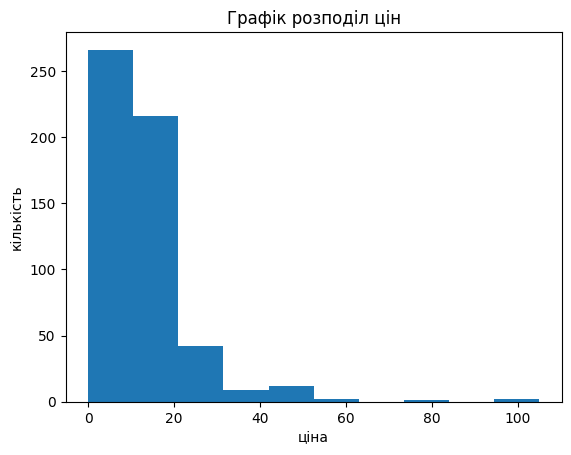

In [53]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

plt.hist(df['price'])
plt.xlabel('ціна')
plt.ylabel('кількість')
plt.title('Графік розподіл цін')
plt.show()

In [54]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

max_p = np.max(df['price'])

min_p = df['price'].describe().loc['min']

mean_p = df['price'].describe().loc['mean']

median_of_prices = df['price'].describe().loc['50%']


In [55]:
print(f'Максимальна ціна? Відповідь: {max_p}') 
print(f'Мінімальна ціна? Відповідь: {min_p}')
print(f'Середня ціна? Відповідь: {mean_p}')
print(f'Медіанна ціна? Відповідь: {median_of_prices}')

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0.0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


In [79]:
print('Який рейтинг у датасеті найвищий? Відповідь:')
np.max(df['user_rating'])

Який рейтинг у датасеті найвищий? Відповідь:


4.9

In [80]:
#Скільки книг мають такий рейтинг?
print('Скільки книг мають такий рейтинг? Відповідь:')
df['user_rating'][df['user_rating'] == max_rat].describe().loc['count']

Скільки книг мають такий рейтинг? Відповідь:


52.0

In [82]:
print('Яка книга має найбільше відгуків? Відповідь:')

max_amount_reviews = np.max(df['reviews'])
df[df['reviews'] == max_amount_reviews]


Яка книга має найбільше відгуків? Відповідь:


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [84]:
print('З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь:')

res = df[df['year'] == 2015].nlargest(n=50, columns=['user_rating'])
res[res['price'] == res['price'].max()]

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь:


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [87]:
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь:')
df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].nlargest(n=50, columns=['user_rating']).shape[0]

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь:


20

In [88]:
print('Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь:')
df[(df['year'] == 2010)|(df['year'] == 2011)][df['user_rating'] == 4.9].shape[0]

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь:


C:\Users\olgapasichnyuk\AppData\Local\Temp\ipykernel_20300\1518781007.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['year'] == 2010)|(df['year'] == 2011)][df['user_rating'] == 4.9].shape[0]


1

In [90]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
print('Яка книга остання у відсортованому списку? Відповідь:')
df[(df['year'] == 2015) &(df['price'] < 8)].sort_values(by=['price'])


Яка книга остання у відсортованому списку? Відповідь:


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


<Axes: xlabel='year', ylabel='price'>

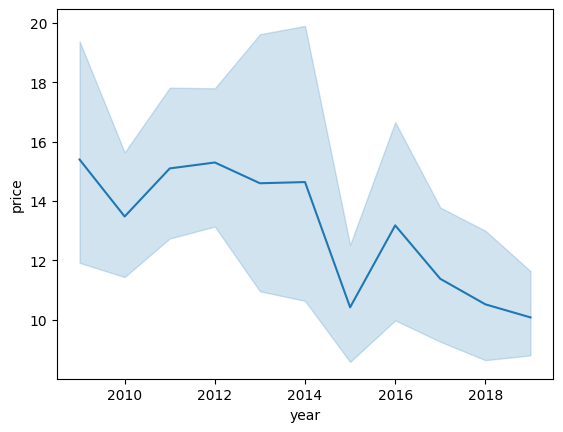

In [98]:
sns.lineplot(y="price", x="year", data=df)

In [141]:
#Агрегування даних та з'єднання таблиць

#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів
#(використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
#Не беріть усі стовпці, виберіть тільки потрібні вам

max_min = df.groupby(['genre']).agg({'price': ['min', 'max']})
max_min

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

<Axes: xlabel='user_rating', ylabel='reviews'>

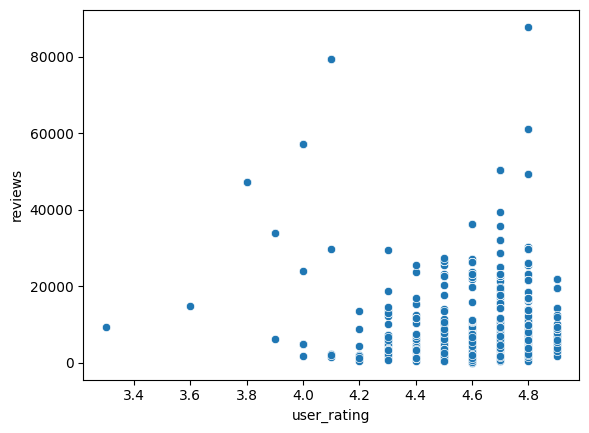

In [176]:
sns.scatterplot(y="reviews", x="user_rating", data=df)

In [142]:
print('Максимальна ціна для жанру Fiction:')

max_min.loc['Fiction'][1]
      

Максимальна ціна для жанру Fiction:


82

In [143]:
print('Мінімальна ціна для жанру Fiction:')
max_min.loc['Fiction'][0]

Мінімальна ціна для жанру Fiction:


0

In [144]:
print('Максимальна ціна для жанру Non Fiction:')

max_min.loc['Non Fiction'][1]

Максимальна ціна для жанру Non Fiction:


105

In [145]:
print('Мінімальна ціна для жанру Non Fiction:')
max_min.loc['Non Fiction'][0]

Мінімальна ціна для жанру Non Fiction:


0

In [160]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
#Не беріть усі стовпці, виберете тільки потрібні

amount_books_by_authors = df.groupby(['author'])['author'].count()
amount_books_by_authors

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: author, Length: 248, dtype: int64

In [147]:
print('Якої розмірності вийшла таблиця?')
amount_books_by_authors.shape

Якої розмірності вийшла таблиця?


(248,)

In [148]:
print('Який автор має найбільше книг?')
amount_books_by_authors[amount_books_by_authors == amount_books_by_authors.max()].index[0]

Який автор має найбільше книг?


'Jeff Kinney'

In [149]:
print('Скільки книг цього автора?')
amount_books_by_authors.max()

Скільки книг цього автора?


12

In [150]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
#Не беріть усі стовпці, виберете тільки потрібні

mean_rating_by_authors = df.groupby(['author'])['user_rating'].mean()
mean_rating_by_authors


author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64

In [151]:
print('У якого автора середній рейтинг мінімальний?')
mean_rating_by_authors[mean_rating_by_authors == mean_rating_by_authors.min()].index[0]

У якого автора середній рейтинг мінімальний?


'Donna Tartt'

In [152]:
print('Який у цього автора середній рейтинг?')
mean_rating_by_authors.min()

Який у цього автора середній рейтинг?


3.9

In [156]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
#(Використовуйте функцію concat з параметром axis=1).
#Збережіть результат у змінну

res = pd.concat([amount_books_by_authors, mean_rating_by_authors], axis=1)
res.columns = ['books_amount', 'mean_user_raiting']
res

,books_amount,mean_user_raiting
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [157]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом 
#використовуйте функцію sort_values

res.sort_values(by=['books_amount', 'mean_user_raiting'])

,books_amount,mean_user_raiting
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [159]:
print('Який автор перший у списку?')

res.sort_values(by=['books_amount', 'mean_user_raiting']).index[0]

Який автор перший у списку?


'Muriel Barbery'